## Tonale Winter School on Cosmology 2022 
# Tutorial on Gravitational Lensing

## Exercise 5: multiple images

This Notebook is the continuation of Notebook 2. The goal of this exercise is to better understand image multiplicity by exploring a range of lens shapes and relative image-source positions.

>**Warning**: it is important that you execute the cells following the order given in the Notebook. If you execute a cell changing the value of a variable and then go back to some previous cell in the Notebook, the variable value will not change!

As usual, we begin by importing some useful packages. We also import the `lensmodels` module.

In [1]:
# import some useful packages and 

import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from astropy.cosmology import FlatLambdaCDM
from PIL import Image
fontsize = 15 # set the font size for labels in the plots
co = FlatLambdaCDM(H0=70.0, Om0=0.3)
from lensmodels import *

We begin by re-loading the class `td_app` from Notebook2. In this Notebook, we will add some features.

In [2]:
class td_app(object):

    def __init__(self,co,theta,image=None,**kwargs):

        self.kwargs = kwargs
        self.lens = sie(co,**self.kwargs)
        self.lens.setGrid(theta=theta)
        self.tancl = self.lens.tancl()
        self.radcl = self.lens.radcl()

        if image == None:
            # create a plot with two panels only
            self.fig,self.ax =plt.subplots(1,2,figsize=(10,5))
            fontsize = 15

            self.beta1 = 0.0
            self.beta2 = 0.0

            self.update_td_plot(self.beta1,self.beta2)
            self.cid = self.fig.canvas.mpl_connect('button_press_event', self.mouse_event)

        else:
            self.fig,self.ax =plt.subplots(1,3,figsize=(12,5))
            fontsize = 15

            self.beta1 = 0.0
            self.beta2 = 0.0

            self.update_td_plot(beta1,beta2)
            self.ax[2].imshow(image)

            self.cid = self.fig.canvas.mpl_connect('button_press_event', self.mouse_event)

        for i in range(2):
            self.ax[i].set_aspect('equal')
            self.ax[i].xaxis.set_tick_params(labelsize=fontsize)
            self.ax[i].yaxis.set_tick_params(labelsize=fontsize)
        self.ax[0].set_xlabel(r'$\beta_1$',fontsize=fontsize)
        self.ax[0].set_ylabel(r'$\beta_2$',fontsize=fontsize)
        self.ax[1].set_xlabel(r'$\theta_1$',fontsize=fontsize)
        self.ax[1].set_ylabel(r'$\theta_2$',fontsize=fontsize)
        plt.tight_layout()


    def mouse_event(self,event):
        print('x: {} and y: {}'.format(event.xdata, event.ydata))
        if event.inaxes not in [self.ax[0]]:
            print ("Not a clickable region!")
            return

        self.ax[0].clear()
        self.ax[1].clear()
        self.update_td_plot(event.xdata,event.ydata)
        for i in range(2):
            self.ax[i].set_aspect('equal')
            self.ax[i].xaxis.set_tick_params(labelsize=fontsize)
            self.ax[i].yaxis.set_tick_params(labelsize=fontsize)
        self.ax[0].set_xlabel(r'$\beta_1$',fontsize=fontsize)
        self.ax[0].set_ylabel(r'$\beta_2$',fontsize=fontsize)
        self.ax[1].set_xlabel(r'$\theta_1$',fontsize=fontsize)
        self.ax[1].set_ylabel(r'$\theta_2$',fontsize=fontsize)
        self.beta1=event.xdata
        self.beta2=event.ydata
        plt.tight_layout()

    def update_td_plot(self,beta1,beta2):

        geomtd = self.geom_tdelay_(beta1=beta1,beta2=beta2)
        gravtd = - self.lens.pot

        FOV= self.lens.theta1.max()-self.lens.theta1.min()


        self.td  = (geomtd + gravtd)*self.lens.conv_fact_time.value
        td_min = self.td.min()
        self.td -= td_min 
        # define some contour levels
        max_td = 1.5*((-self.lens.pot).max()-td_min)

        if max_td>0:
            self.levels = np.linspace(0,max_td,30)
        else:
            self.levels=30

        self.ax[1].contourf(self.td,levels=self.levels,cmap=cm.coolwarm,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.])
        self.ax[1].contour(self.td,levels=self.levels,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.],colors='white')
        self.ax[0].contour(self.td,levels=self.levels,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.],colors='white',alpha=0.0)
        for cl in self.tancl:
            cau = self.lens.crit2cau(cl)
            thetac2, thetac1 = cl[:,0], cl[:,1]
            betac2, betac1 = cau[:,0], cau[:,1]
            self.ax[1].plot(thetac1,thetac2,'--',color='black')
            self.ax[0].plot(betac1,betac2,'-',color='black')

        for cl in self.radcl:
            cau = self.lens.crit2cau(cl)
            thetac2, thetac1 = cl[:,0], cl[:,1]
            betac2, betac1 = cau[:,0], cau[:,1]
            self.ax[1].plot(thetac1,thetac2,'--',color='black')
            self.ax[0].plot(betac1,betac2,'-',color='black')

        self.ax[0].plot(beta1,beta2,'o',ms=5,color='red')



    def geom_tdelay_(self,beta1=0.0,beta2=0.0):
        """
        Function to calculate the geometrical time delay:
        inputs: 
        - theta1, theta2 :: mesh of coordinates where the time delay will be evaluated
        - beta1, beta2 :: unlensed source coordinates
        output: 
        - geometrical time delay surface  
        """
        return (0.5*((self.lens.theta1-beta1)**2+(self.lens.theta2-beta2)**2))

Use the app to display the caustics and the time delay contours of a lens of your choice. Then click in the left panel to choose a source position. 

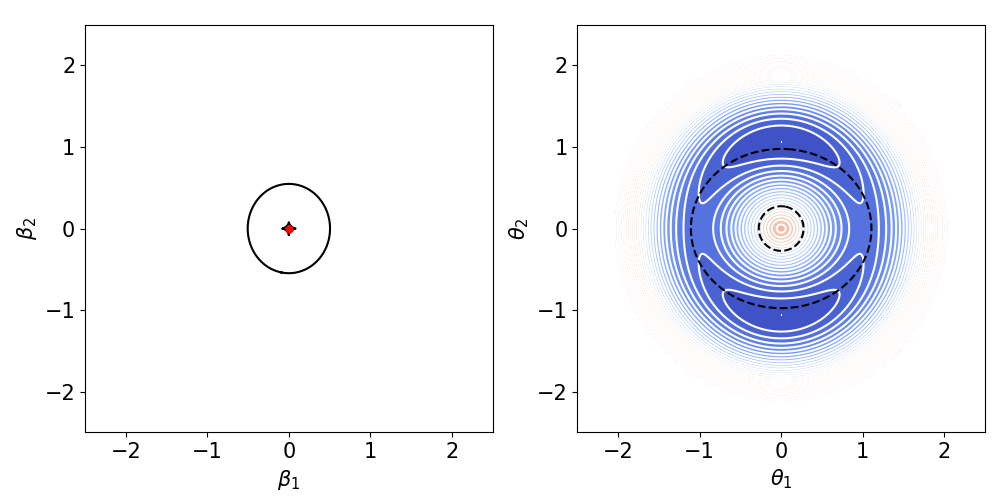

In [3]:
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 250.0,
          'q': 0.9,
          'pa': 0,
          'theta_c': 0.1,
          'x1': 0.0,
          'x2': 0.0}

tdelay=td_app(co,theta,**kwargs)

Note that we lauched the app by giving the name `tdelay` to the instance of the `td_app` class. This gives us the possibility to access to some attributes of `tdelay` for our next example. The lens instance is store in `tdelay.lens` and the time delay surface can be accessed as `tdelay.lens.td`. The time delay contour levels shown in the right panel above are stored in `tdelay.levels`. The source position defined by your mouse click has coordinates `tdelay.beta1` and `tdelay.beta2`.

The module `lensmodels` contains a class called `pointsrc`, which you can use to create instances of point sources. The lens instance can be passed as an argument to the `__init___` function to indicate that the point source will be lensed. Internally, the positions and magnifications of the multiple images are automatically calculated and stored in the attributes `xi1`, `xi2`, and `mui`. It works as follows:

5 images were found!
Magnifications: [14.74985718 13.60740478 13.72578265  0.04520884 14.65204738]
theta1: [-0.00631464  1.01084073 -1.02137138 -0.00326158 -0.00347009]
theta2: [-1.06938075 -0.00301294 -0.0067718  -0.00652316  1.06022156]


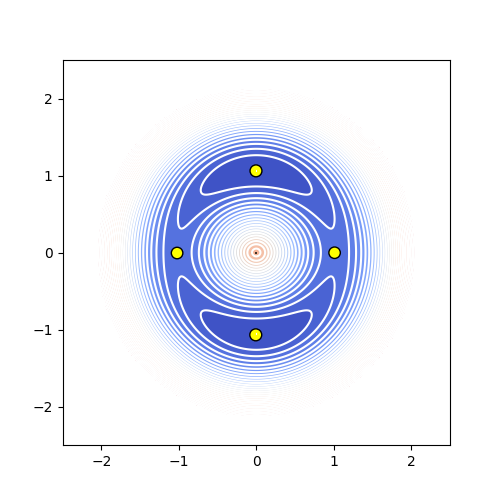

In [7]:

# we define a dicrionary with the source redshift and unlensed coordinates. The flux is not relevant.
kwargs_psr = {
    'zs': zs,
    'ys1': tdelay.beta1,
    'ys2': tdelay.beta2,
    'flux': 1.0
}

# we create an instance of the point source. 
ps=pointsrc(size=FOV, sizex=None, sizey=None, Npix=npix, gl=tdelay.lens, **kwargs_psr)
# access the multiple image positions and magnifications
thetai_1, thetai_2, mui = ps.xi1, ps.xi2, ps.mui

print (('%i images were found!') % (len(thetai_1)))
print ('Magnifications:',mui)
print ('theta1:',thetai_1)
print ('theta2:',thetai_2)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(tdelay.td,levels=tdelay.levels,cmap=cm.coolwarm,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.])
ax.contour(tdelay.td,levels=tdelay.levels,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.],colors='white')

ax.scatter(thetai_1,thetai_2,s=mui.astype(float)*5,marker='o',edgecolors='black',color='yellow')


>**Note**: Finding the multiple images of a source is not a trivial problem. It implies solving the lens equation numerically in most cases. In the `pointsrc` class, this task is performed by the `find_images` method. More details on how this method works can be found in the literature [see for example [(Bartelmann, 2003)](https://ui.adsabs.harvard.edu/abs/2003astro.ph..4162B/abstract), Sect. 2.7]. Unfortunately, as you can verify by increasing the number of pixels `npix`, the inversion of the lens equation is not fast (the algorithm implemented in `pointsrc` could be improved to increase the speed, but this is not the purpose of this exercise).

For the lens and source system above, the multiple image positions are shown with yellow circles. The size of each circle is proportional to the absolute image magnification.

The class `td_app_new` below is an extension of the `td_class` from yesterday's Notebook, including the procedure we just outlined to display the source multiple images on the top of the time delay surface.

In [5]:
class td_app_new(object):

    def __init__(self,co,theta,image=None,sersic=False,re=0.2,**kwargs):

        self.kwargs = kwargs
        self.lens = sie(co,**self.kwargs)
        self.lens.setGrid(theta=theta)
        self.tancl = self.lens.tancl()
        self.radcl = self.lens.radcl()
        self.re = re
        self.sersic = sersic

        if image == None:
            # create a plot with two panels only
            self.fig,self.ax =plt.subplots(1,2,figsize=(10,5))
            fontsize = 15

            self.beta1 = 0.0
            self.beta2 = 0.0

            self.update_td_plot(self.beta1,self.beta2)
            self.cid = self.fig.canvas.mpl_connect('button_press_event', self.mouse_event)

        else:
            self.fig,self.ax =plt.subplots(1,3,figsize=(12,5))
            fontsize = 15

            self.beta1 = 0.0
            self.beta2 = 0.0

            self.update_td_plot(self.beta1,self.beta2)
            
            self.ax[2].imshow(image)

            self.cid = self.fig.canvas.mpl_connect('button_press_event', self.mouse_event)

        for i in range(2):
            self.ax[i].set_aspect('equal')
            self.ax[i].xaxis.set_tick_params(labelsize=fontsize)
            self.ax[i].yaxis.set_tick_params(labelsize=fontsize)
        self.ax[0].set_xlabel(r'$\beta_1$',fontsize=fontsize)
        self.ax[0].set_ylabel(r'$\beta_2$',fontsize=fontsize)
        self.ax[1].set_xlabel(r'$\theta_1$',fontsize=fontsize)
        self.ax[1].set_ylabel(r'$\theta_2$',fontsize=fontsize)
        plt.tight_layout()


    def mouse_event(self,event):
        if event.inaxes not in [self.ax[0]]:
            print ("Not a clickable region!")
            return

        self.ax[0].clear()
        self.ax[1].clear()
        self.update_td_plot(event.xdata,event.ydata)
        for i in range(2):
            self.ax[i].set_aspect('equal')
            self.ax[i].xaxis.set_tick_params(labelsize=fontsize)
            self.ax[i].yaxis.set_tick_params(labelsize=fontsize)
        self.ax[0].set_xlabel(r'$\beta_1$',fontsize=fontsize)
        self.ax[0].set_ylabel(r'$\beta_2$',fontsize=fontsize)
        self.ax[1].set_xlabel(r'$\theta_1$',fontsize=fontsize)
        self.ax[1].set_ylabel(r'$\theta_2$',fontsize=fontsize)
        self.beta1=event.xdata
        self.beta2=event.ydata
        plt.tight_layout()

    def update_td_plot(self,beta1,beta2):

        geomtd = self.geom_tdelay_(beta1,beta2)
        gravtd = - self.lens.pot

        FOV= self.lens.theta1.max()-self.lens.theta1.min()


        self.td  = (geomtd + gravtd)*self.lens.conv_fact_time.value
        td_min = self.td.min()
        self.td -= td_min 
        # define some contour levels
        max_td = 1.5*((-self.lens.pot).max()-td_min)

        if max_td>0:
            self.levels = np.linspace(0,max_td,30)
        else:
            self.levels=30

        self.ax[1].contourf(self.td,levels=self.levels,cmap=cm.coolwarm,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.])
        self.ax[1].contour(self.td,levels=self.levels,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.],colors='white')
        self.ax[0].contour(self.td,levels=self.levels,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.],colors='white',alpha=0.0)
        for cl in self.tancl:
            cau = self.lens.crit2cau(cl)
            thetac2, thetac1 = cl[:,0], cl[:,1]
            betac2, betac1 = cau[:,0], cau[:,1]
            self.ax[1].plot(thetac1,thetac2,'--',color='black',zorder=20)
            self.ax[0].plot(betac1,betac2,'-',color='black',zorder=20)

        for cl in self.radcl:
            cau = self.lens.crit2cau(cl)
            thetac2, thetac1 = cl[:,0], cl[:,1]
            betac2, betac1 = cau[:,0], cau[:,1]
            self.ax[1].plot(thetac1,thetac2,'--',color='black',zorder=20)
            self.ax[0].plot(betac1,betac2,'-',color='black',zorder=20)

        

        
        if self.sersic:
            kwargs_se={
                'n': 1.0,
                're': self.re,
                'q': 1.0,
                'pa': 0.0,
                'ys1': beta1,
                'ys2': beta2,
                'zs': self.lens.zs
            }

            se = sersic(size=FOV, sizex=None, sizey=None, Npix=self.lens.nray1, gl=self.lens, save_unlensed=True, **kwargs_se)
            self.ax[0].imshow(se.image_unlensed,origin='lower',cmap='gray_r',alpha=0.7,zorder=10,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.])
            self.ax[1].imshow(se.image,origin='lower',cmap='gray_r',alpha=0.7,zorder=10,extent=[-FOV/2.,FOV/2.,-FOV/2.,FOV/2.])

        else:
            self.ax[0].plot(beta1,beta2,'o',ms=5,color='red')
            kwargs_psr = {
                'zs': self.lens.zs,
                'ys1': beta1,
                'ys2': beta2,
                'flux': 1.0
            }

            ps=pointsrc(size=FOV, sizex=None, sizey=None, Npix=self.lens.nray1, gl=self.lens, **kwargs_psr)
            thetai_1, thetai_2, mui = ps.xi1, ps.xi2, ps.mui
            
            if len(thetai_1>0):
                print (mui)
                isel = mui > 25
                mui[isel] =25
                self.ax[1].scatter(thetai_1,thetai_2,s=(mui*5+15.0),marker='o',edgecolors='black',color='yellow')

        

    def geom_tdelay_(self,beta1,beta2):
        """
        Function to calculate the geometrical time delay:
        inputs: 
        - theta1, theta2 :: mesh of coordinates where the time delay will be evaluated
        - beta1, beta2 :: unlensed source coordinates
        output: 
        - geometrical time delay surface  
        """
        return (0.5*((self.lens.theta1-beta1)**2+(self.lens.theta2-beta2)**2))

Let's try! The image magnifications are printed on screen after each mouse click.


>**TASK**: Try a few examples of lens-source configurations. In particular, create configurations such that
>
> * five images form, three of which are nearly merged along the tangential critcial line
> * three images form, all of which are nearly merged along the tangential critical line
> * four images form
> * two images form
> * three images form, two of which are nearly merged along the radial critical line
> * five images form, of which two are nearly merged along the radial critical line
> * five images form, of which two are nearly merged along the tangential critical lines
> * five images form, all of them with high magnification (try the best you can, but let say $\mu>5$ for all images) 


ValueError: too many values to unpack (expected 3)

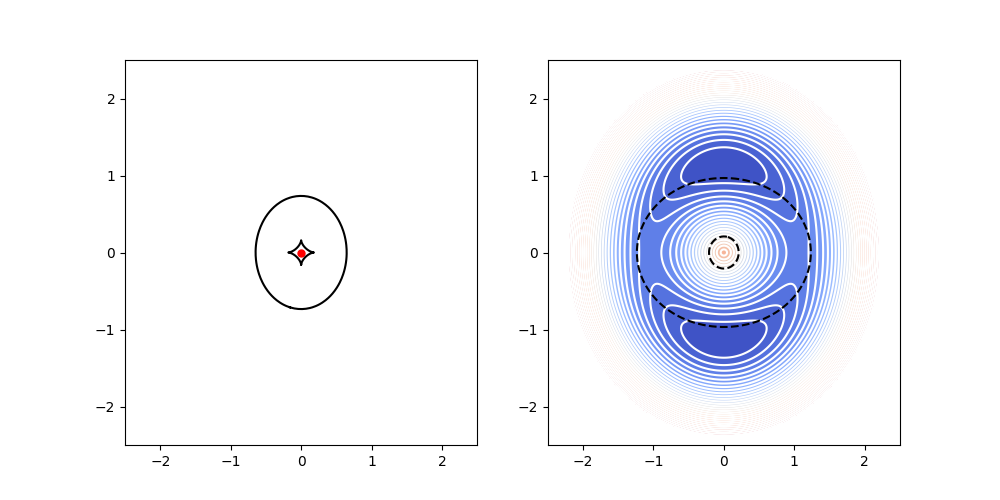

In [6]:
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 250.0,
          'q': 0.8,
          'pa': 0,
          'theta_c': 0.05,
          'x1': 0.0,
          'x2': 0.0}


tdelay=td_app_new(co,theta,**kwargs)

### Tangential and radial magnifications

The curvature of the time delay surface at the image positions reflects the magnification. The flatter is the time delay surface, the largest is the magnification. remember that the total magnification is 
$$
\mu(\vec\theta) = \det A^{-1}(\vec\theta) = [1-\kappa(\vec\theta)-\gamma(\vec\theta)]^{-1}[1-\kappa(\vec\theta)+\gamma(\vec\theta)]^{-1}
$$ 
Thus, we can define two magnification components. The first is the *tangential* magnification:
$$
\mu_t(\vec\theta) = [1-\kappa(\vec\theta)-\gamma(\vec\theta)]^{-1}=\lambda_t^{-1}(\vec\theta)
$$
and the second is the *radial* magnification
$$
\mu_r(\vec\theta) = [1-\kappa(\vec\theta)+\gamma(\vec\theta)]^{-1}=\lambda_r^{-1}(\vec\theta) \;.
$$
When the time delay surface is flatter in the direction tangential to the lens mass distribution than towards the center of the lens, then the tangential magnification is dominant, and the images will be stretched tangentially. Otherwise, the images will be elongated in the radial direction. If $\mu_t \simeq \mu_r$, the distortion is nearly isotropic.  


In the class `td_app_new`, I have implemented a feature that allows to visualize how images of extended sources are distorted, to better understand which component of the magnification is dominant at a certain position in the image (lens) plane.

To enable this feature, you need to call the `td_app_new` initializer by adding a couple of optional input flags/parameters: `sersic=True` indicates that the point source will be substituted with a source with an exponential profile (a S\`ersic profile with index $n=1$). The size of the source is controlled by the parameter `re`, whose value must be provided in arcsec. If no value is specified, `re=0.2` is assumed.

>**TASK**: try repeating the previous exercise to visualize the tangential and radial stretching of the images.


In [ ]:
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 250.0,
          'q': 0.8,
          'pa': 0,
          'theta_c': 0.2,
          'x1': 0.0,
          'x2': 0.0}


tdelay=td_app_new(co,theta,sersic=True,re=0.1,**kwargs)

>**TASK**: Try to change the source size, while keeping the lens fixed. What do you notice?

## Reproduce some real lenses!

Using the app you just built, it should be easy for you to figure out what is the time delay surface of a particular gravitational lens system and reproduce the image geometry/distortions. 

>**TASK**: Try to reproduce the time delay surface and the image distortions of the three gravitational lensing events in the right panels. You can assume that the side length of each lens image is 5 arcsec. This number is arbitrary, but at the moment you are not trying to reproduce the lens size, only the shape of the time delay surface. For the same reason, you may assume $z_L=0.5$ and $z_S=2.0$ for all lens systems. If you want, you can google the lens name and gather some more information on sizes and redshifts. Perhaps, you'll be able to reproduce also the scale of the lens systems.
>
> Feel free to switch on and off the extended source mode when needed

### G2237+0305

In [ ]:
from PIL import Image
im = Image.open('./data/G2237+0305.jpeg')

# DON'T CHANGE THESE PARAMETERS (UNLESS YOU WANT TO GATHER MORE INFOS ABOUT THE LENS)
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 300.0,
          'q': 0.6,
          'pa': np.pi/4.0,
          'theta_c': 0.05,
          'x1': 0.0,
          'x2': 0.0}

tdelay=td_app_new(co,theta,image=im,sersic=True,re=0.1,**kwargs)

### MS2137 (image system A)

In [ ]:
from PIL import Image
im = Image.open('./data/MS2137_crop.png')

# DON'T CHANGE THESE PARAMETERS (UNLESS YOU WANT TO GATHER MORE INFOS ABOUT THE LENS)
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 300.0,
          'q': 0.6,
          'pa': np.pi/4.0,
          'theta_c': 0.05,
          'x1': 0.0,
          'x2': 0.0}

td_app_new(co,theta,image=im,sersic=True,re=0.2,**kwargs)

### MS2137 (image system B)

In [ ]:
from PIL import Image
im = Image.open('./data/MS2137b.png')

# DON'T CHANGE THESE PARAMETERS (UNLESS YOU WANT TO GATHER MORE INFOS ABOUT THE LENS)
FOV = 5.0 # the Field-of-View will be FOVxFOV arcsec 
npix= 512 # the number of pixels in the maps will be (npix x npix)

theta = np.linspace(-FOV/2., FOV/2, npix)

zl = 0.5
zs = 2.0

# MODIFY THE LENS PARAMETERS AS NEEDED
kwargs = {'zl': zl,
          'zs': zs,
          'sigma0': 300.0,
          'q': 0.6,
          'pa': np.pi/4.0,
          'theta_c': 0.05,
          'x1': 0.0,
          'x2': 0.0}

td_app_new(co,theta,image=im,sersic=True,re=0.3,**kwargs)